In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('data.csv')
df.head(10)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [10]:
#data processing 
#empty values
print(df.isnull().sum())


Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB
None


In [11]:
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if not pd.to_numeric(df[col], errors='coerce').notnull().all():
        print(f"found non-numeric values col:{col}")

found non-numeric values col:Calories


In [12]:
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    # if df[col].min() < 0:
    if (df[col]<0 ).any():
        # Check if there are negative numeric values
        print(f"found negative numeric values col:{col}")

In [13]:
# duplicates
duplicates = df.duplicated()
if duplicates.any():
    print("Found duplicates in the dataset")
    print(df[duplicates])
else:
    print("No duplicates found in the dataset")

Found duplicates in the dataset
     Duration  Pulse  Maxpulse  Calories
36         60    102       127     300.0
37         60    100       120     300.0
38         60    100       120     300.0
40         45     90       112     180.1
71         60    109       153     387.6
113        45    100       120     225.3
155        60    111       151     368.5


In [ ]:
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
   df[col].fillna(df[col].mean(), inplace=True)
   # df[col] = pd.to_numeric(df[col], errors='coerce')
   # df[col]=df[col].fillna(df[col].mean())
df.drop_duplicates(inplace=True)

In [32]:
print(df.to_string())

     Duration  Pulse  Maxpulse     Calories
0          60    110       130   409.100000
1          60    117       145   479.000000
2          60    103       135   340.000000
3          45    109       175   282.400000
4          45    117       148   406.000000
5          60    102       127   300.000000
6          60    110       136   374.000000
7          45    104       134   253.300000
8          30    109       133   195.100000
9          60     98       124   269.000000
10         60    103       147   329.300000
11         60    100       120   250.700000
12         60    106       128   345.300000
13         60    104       132   379.300000
14         60     98       123   275.000000
15         60     98       120   215.200000
16         60    100       120   300.000000
17         45     90       112   375.790244
18         60    103       123   323.000000
19         45     97       125   243.000000
20         60    108       131   364.200000
21         45    100       119  

In [33]:
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [36]:
print(df.shape)
print(df.describe())
print(df.info())

(162, 4)
         Duration       Pulse    Maxpulse     Calories
count  162.000000  162.000000  162.000000   162.000000
mean    64.197531  107.709877  134.265432   379.302785
std     43.151882   14.711588   16.471618   267.096544
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   255.075000
50%     60.000000  105.500000  131.000000   324.100000
75%     60.000000  111.000000  141.000000   386.700000
max    300.000000  159.000000  184.000000  1860.400000
<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  162 non-null    int64  
 1   Pulse     162 non-null    int64  
 2   Maxpulse  162 non-null    int64  
 3   Calories  162 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.3 KB
None


In [4]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Duration Distribution')

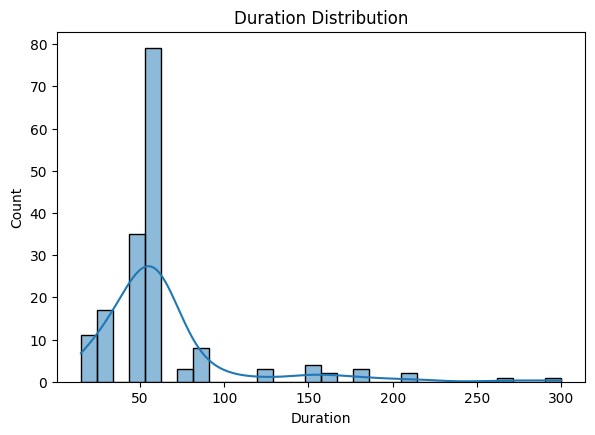

In [ ]:
# histogram for duration
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Duration Distribution')

Text(0.5, 1.0, 'Pulse vs Calories')

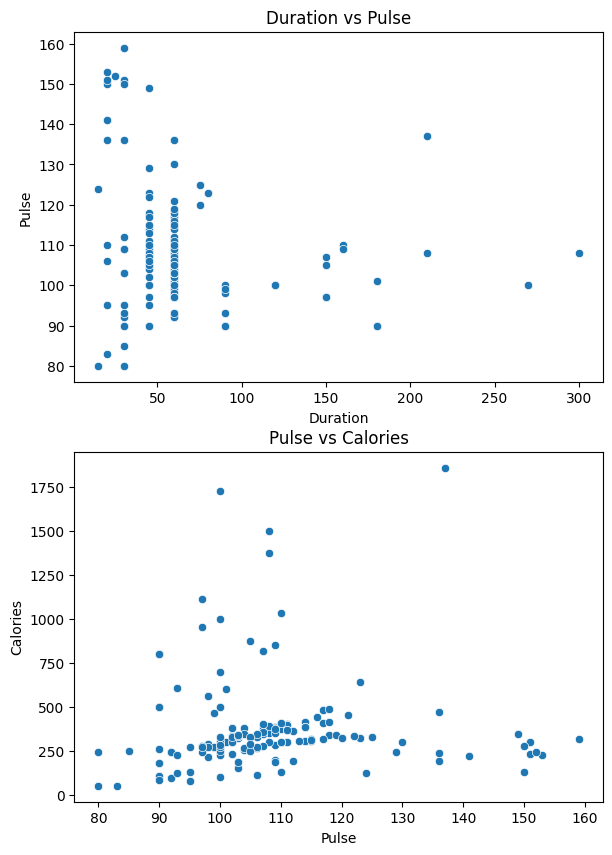

In [42]:
# scatter plot for Duartion vs pulse
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Duration', y='Pulse', data=df)
plt.title('Duration vs Pulse')
# scatter for pulse v calories
plt.subplot(2, 2, 3)
sns.scatterplot(x='Pulse', y='Calories', data=df)
plt.title('Pulse vs Calories')

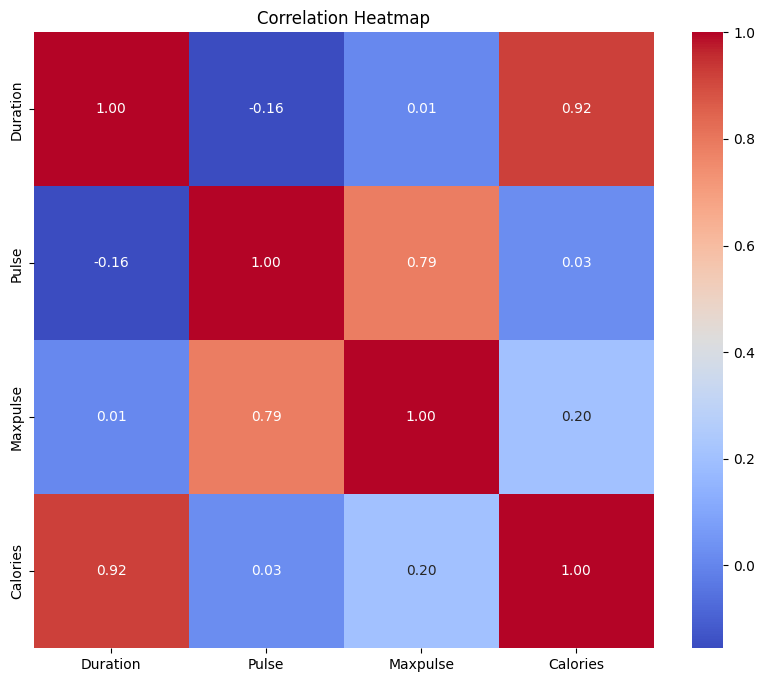

In [44]:
# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

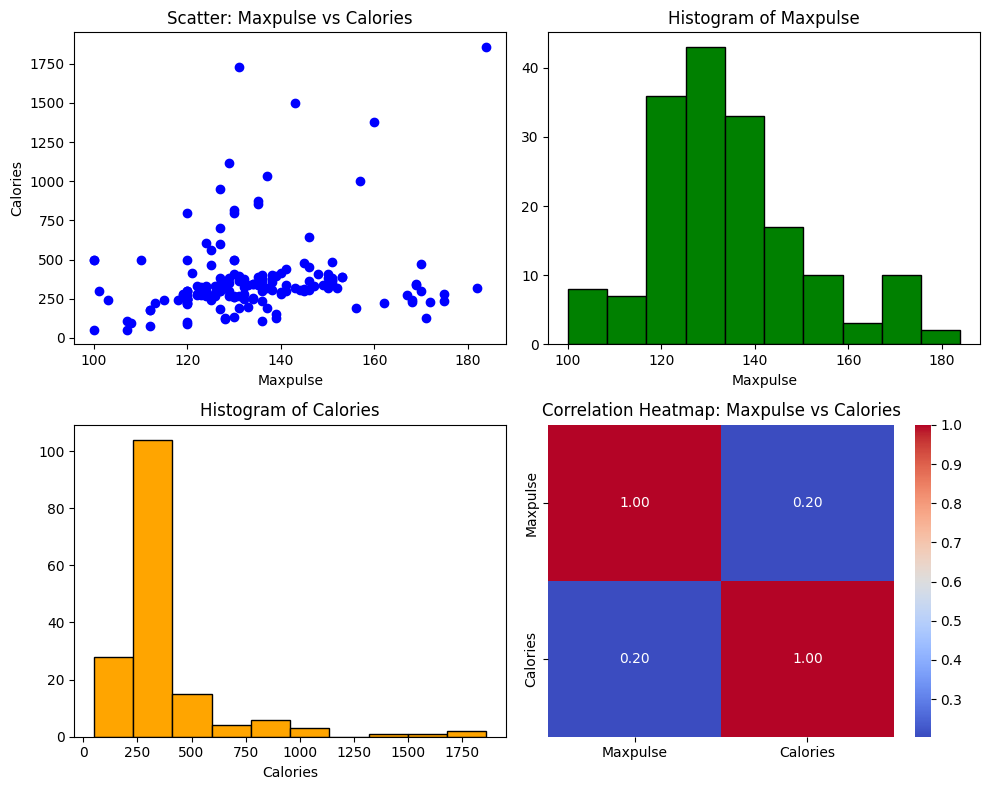

: 

In [ ]:
# plot for maxpulse and calories ->scatter plot(maxpulse v calories),histogram
plt.figure(figsize=(10, 8))

# 1. Scatter plot
plt.subplot(2, 2, 1)
plt.scatter(df['Maxpulse'], df['Calories'], color='blue')
plt.title('Scatter: Maxpulse vs Calories')
plt.xlabel('Maxpulse')
plt.ylabel('Calories')

# 2. Histogram of Maxpulse
plt.subplot(2, 2, 2)
plt.hist(df['Maxpulse'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Maxpulse')
plt.xlabel('Maxpulse')

# 3. Histogram of Calories
plt.subplot(2, 2, 3)
plt.hist(df['Calories'], bins=10, color='orange', edgecolor='black')
plt.title('Histogram of Calories')
plt.xlabel('Calories')

# 4. correlation heatmap
plt.subplot(2, 2, 4)
sns.heatmap(df[['Maxpulse', 'Calories']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Maxpulse vs Calories')
# Layout adjustment
plt.tight_layout()
plt.show()
